<a href="https://colab.research.google.com/github/SiweiLuo/DL_with_Python/blob/master/01_neural_nets_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Dense 

output_layer = Dense(10) 

from tensorflow.keras.layers import Dense 

output_layer = Dense(10) 


Using TensorFlow backend.
W0716 05:41:37.222729 140067241215872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 05:41:37.263126 140067241215872 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
%matplotlib inline 
%load_ext tensorboard



In [0]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import sklearn 
import sys 
import tensorflow as tf 
from tensorflow import keras 
import time 

In [6]:
print("python",sys.version) 
for module in mpl,np,pd,sklearn,tf.keras: 
  print(module.__name__,module.__version__) 
  
  

python 3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]
matplotlib 3.0.3
numpy 1.16.4
pandas 0.24.2
sklearn 0.21.2
tensorflow.keras 2.2.4-tf


In [0]:
assert sys.version_info >= (3,5) 
assert tf.__version__ >="1.0" 

In [11]:
fashion_mnist = keras.datasets.fashion_mnist 
(x_train_full,y_train_full),(x_test,y_test) = (
    fashion_mnist.load_data()) 

x_valid ,x_train = x_train_full[:5000],x_train_full[5000:]
y_valid, y_train = y_train_full[:5000],y_train_full[5000:] 

4423680/4422102 [==============================] - 0s 0us/step


In [12]:
x_train.shape

(55000, 28, 28)

In [13]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  44, 127,
        182, 185, 161, 120,  55,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 198, 251, 255,
        251, 249, 247, 255, 252, 214, 100,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0,   0, 233, 252, 237, 239,
        234, 237, 235, 237, 237, 254, 227,   0,   0,   0,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  16, 210, 225, 215, 175,
        217, 216, 193, 196, 226, 221, 209,  50,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 199, 229, 232, 230, 245, 204,
        219, 253, 245, 207, 194, 223, 231, 236, 235,   0,   0,   3,   0,
          0,   0],
       [  

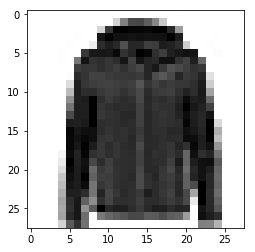

In [14]:
plt.imshow(x_train[0],cmap="binary")
plt.show() 

In [15]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [0]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
               "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [18]:
class_names[y_train[0]]

'Coat'

In [19]:
x_valid.shape

(5000, 28, 28)

In [20]:
x_test.shape

(10000, 28, 28)

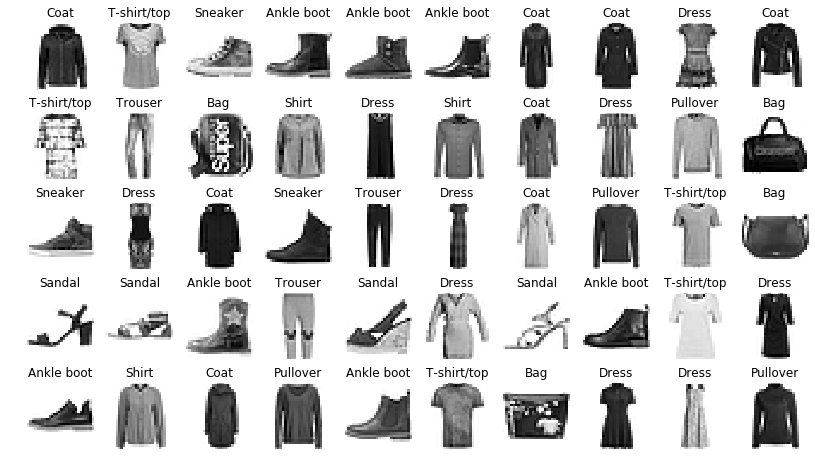

In [21]:
n_rows = 5 
n_cols = 10 
plt.figure(figsize=(n_cols*1.4,n_rows*1.6)) 

for row in range(n_rows): 
  for col in range(n_cols): 
    index = n_cols*row + col 
    plt.subplot(n_rows,n_cols,index+1) 
    plt.imshow(x_train[index],cmap="binary",interpolation="nearest") 
    plt.axis("off") 
    plt.title(class_names[y_train[index]]) 
    
plt.show() 

In [0]:
model = keras.models.Sequential() 

model.add(keras.layers.Flatten(input_shape=[28,28])) 
model.add(keras.layers.Dense(300,activation="relu")) 